In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore') 
df=pd.read_csv("https://raw.githubusercontent.com//Premalatha-success//Datasets//main//h1n1_vaccine_prediction.csv") 
df.head() 


,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [3]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [4]:
df.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [5]:
df.shape

(26707, 34)

In [6]:
duplicate=df.duplicated()
duplicate.sum()

0

In [7]:
df.median()

unique_id                    13353.0
h1n1_worry                       2.0
h1n1_awareness                   1.0
antiviral_medication             0.0
contact_avoidance                1.0
bought_face_mask                 0.0
wash_hands_frequently            1.0
avoid_large_gatherings           0.0
reduced_outside_home_cont        0.0
avoid_touch_face                 1.0
dr_recc_h1n1_vacc                0.0
dr_recc_seasonal_vacc            0.0
chronic_medic_condition          0.0
cont_child_undr_6_mnths          0.0
is_health_worker                 0.0
has_health_insur                 1.0
is_h1n1_vacc_effective           4.0
is_h1n1_risky                    2.0
sick_from_h1n1_vacc              2.0
is_seas_vacc_effective           4.0
is_seas_risky                    2.0
sick_from_seas_vacc              2.0
no_of_adults                     1.0
no_of_children                   0.0
h1n1_vaccine                     0.0
dtype: float64

In [8]:
#filling null values with median
df= df.fillna(df.median())
df.isna().sum()     

unique_id                       0
h1n1_worry                      0
h1n1_awareness                  0
antiviral_medication            0
contact_avoidance               0
bought_face_mask                0
wash_hands_frequently           0
avoid_large_gatherings          0
reduced_outside_home_cont       0
avoid_touch_face                0
dr_recc_h1n1_vacc               0
dr_recc_seasonal_vacc           0
chronic_medic_condition         0
cont_child_undr_6_mnths         0
is_health_worker                0
has_health_insur                0
is_h1n1_vacc_effective          0
is_h1n1_risky                   0
sick_from_h1n1_vacc             0
is_seas_vacc_effective          0
is_seas_risky                   0
sick_from_seas_vacc             0
age_bracket                     0
qualification                1407
race                            0
sex                             0
income_level                 4423
marital_status               1408
housing_status               2042
employment    

array([[<Axes: title={'center': 'unique_id'}>,
        <Axes: title={'center': 'h1n1_worry'}>,
        <Axes: title={'center': 'h1n1_awareness'}>,
        <Axes: title={'center': 'antiviral_medication'}>,
        <Axes: title={'center': 'contact_avoidance'}>],
       [<Axes: title={'center': 'bought_face_mask'}>,
        <Axes: title={'center': 'wash_hands_frequently'}>,
        <Axes: title={'center': 'avoid_large_gatherings'}>,
        <Axes: title={'center': 'reduced_outside_home_cont'}>,
        <Axes: title={'center': 'avoid_touch_face'}>],
       [<Axes: title={'center': 'dr_recc_h1n1_vacc'}>,
        <Axes: title={'center': 'dr_recc_seasonal_vacc'}>,
        <Axes: title={'center': 'chronic_medic_condition'}>,
        <Axes: title={'center': 'cont_child_undr_6_mnths'}>,
        <Axes: title={'center': 'is_health_worker'}>],
       [<Axes: title={'center': 'has_health_insur'}>,
        <Axes: title={'center': 'is_h1n1_vacc_effective'}>,
        <Axes: title={'center': 'is_h1n1_ri

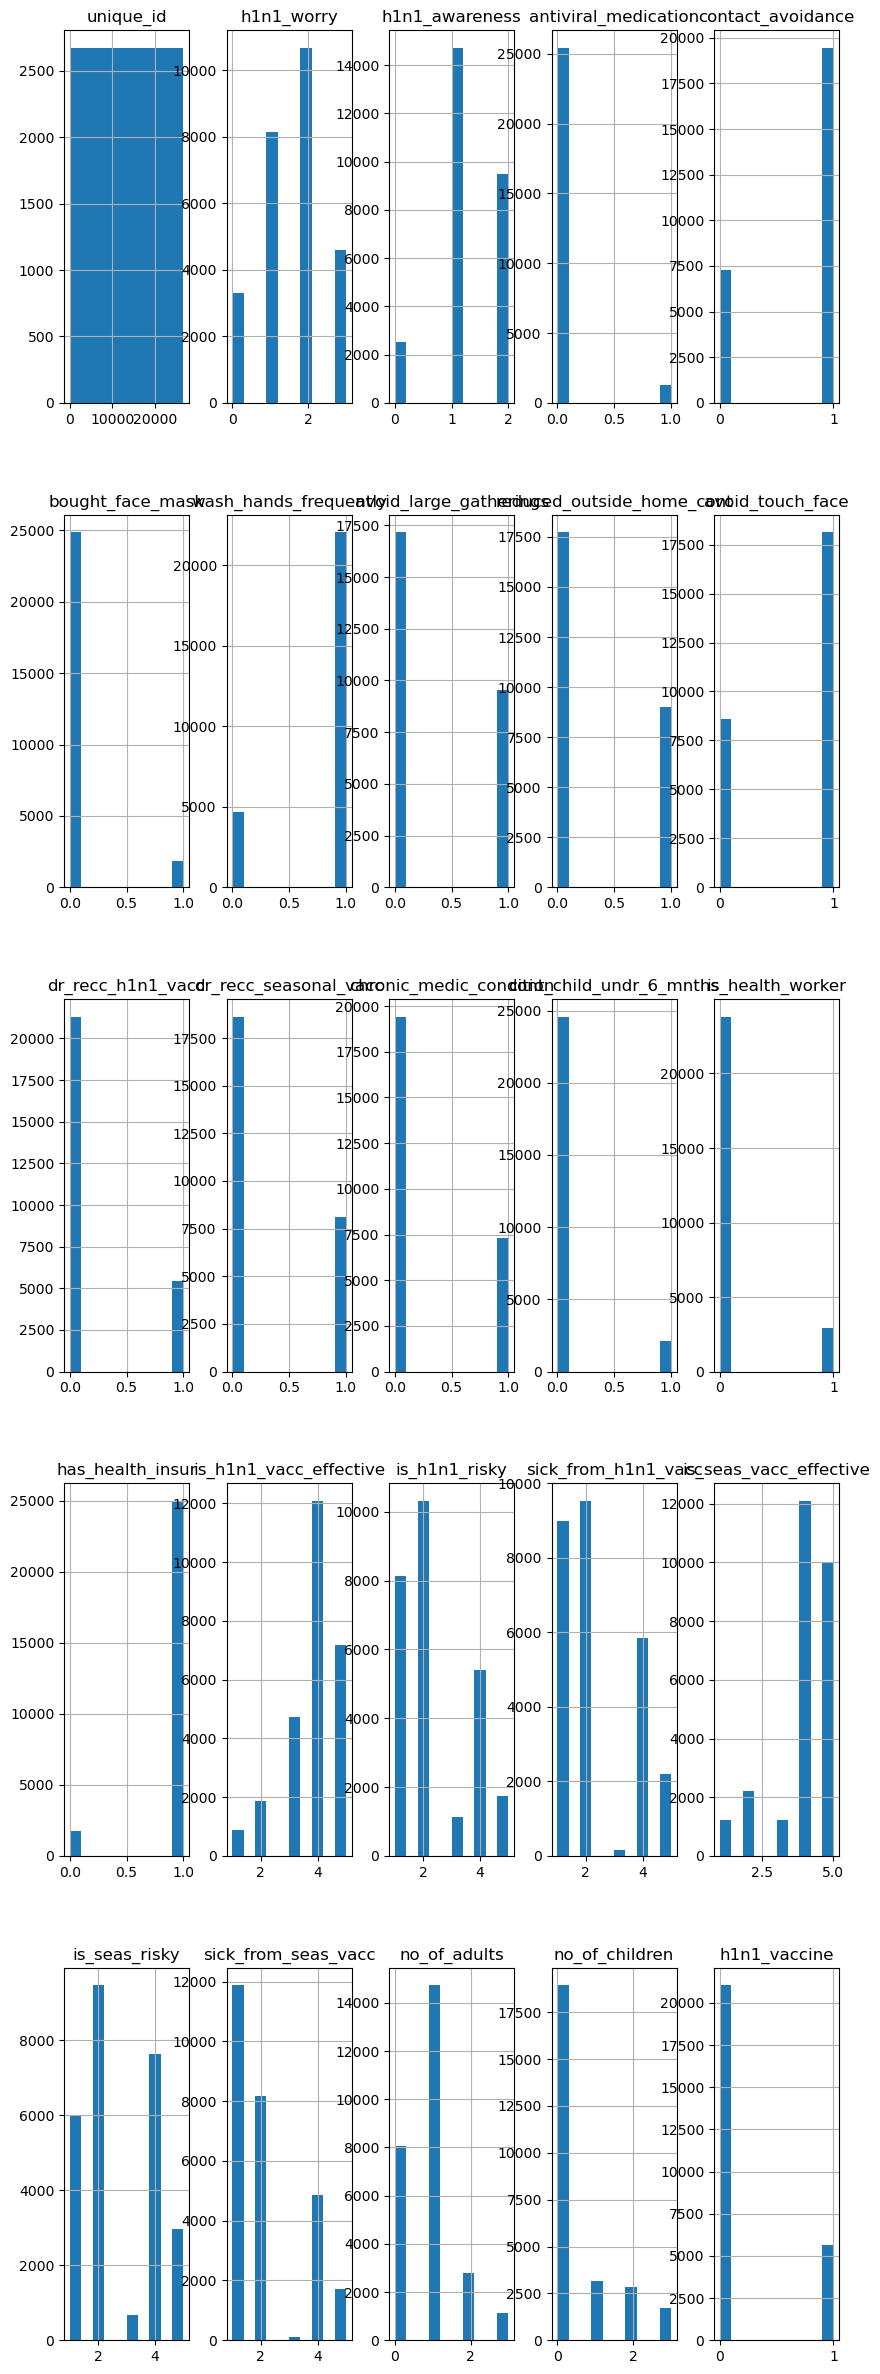

In [9]:
df.hist(figsize=(10,30))

In [10]:
corr=df.corr()
corr

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
unique_id,1.000000,0.017896,0.003473,-0.008458,0.008912,-0.006654,0.011212,0.004455,0.009181,0.007606,...,-0.009476,0.005753,0.000830,-0.002379,0.005880,-0.005545,0.009406,0.000172,-0.003650,-0.003280
h1n1_worry,0.017896,1.000000,0.060828,0.089866,0.229648,0.155757,0.291670,0.254133,0.245404,0.245038,...,0.024724,0.235841,0.372716,0.355637,0.231649,0.327986,0.222392,-0.016079,0.049441,0.121574
h1n1_awareness,0.003473,0.060828,1.000000,-0.010450,0.087194,0.029888,0.089690,-0.047293,-0.066479,0.084633,...,0.092251,0.119010,0.074394,-0.017038,0.085281,0.081156,-0.060241,0.023866,0.053378,0.117771
antiviral_medication,-0.008458,0.089866,-0.010450,1.000000,0.048533,0.145772,0.063996,0.106314,0.127204,0.069982,...,-0.051810,0.030172,0.102553,0.076930,0.014498,0.081503,0.082177,0.044829,0.083090,0.040226
contact_avoidance,0.008912,0.229648,0.087194,0.048533,1.000000,0.064155,0.334974,0.225402,0.217599,0.329796,...,0.025377,0.109066,0.116259,0.129983,0.117356,0.127991,0.081887,0.017995,0.038977,0.046837
bought_face_mask,-0.006654,0.155757,0.029888,0.145772,0.064155,1.000000,0.083229,0.180377,0.162964,0.103603,...,-0.027177,0.037679,0.128316,0.104655,0.040889,0.105917,0.087917,0.014191,0.004794,0.070413
wash_hands_frequently,0.011212,0.291670,0.089690,0.063996,0.334974,0.083229,1.000000,0.194750,0.191804,0.362979,...,0.032339,0.134815,0.167414,0.148739,0.136936,0.170655,0.087040,0.009367,0.047451,0.074570
avoid_large_gatherings,0.004455,0.254133,-0.047293,0.106314,0.225402,0.180377,0.194750,1.000000,0.580881,0.251383,...,-0.028658,0.052432,0.125076,0.183517,0.078208,0.130800,0.133398,-0.030994,-0.009126,0.018089
reduced_outside_home_cont,0.009181,0.245404,-0.066479,0.127204,0.217599,0.162964,0.191804,0.580881,1.000000,0.265401,...,-0.031898,0.050866,0.123348,0.171669,0.066861,0.117428,0.135835,-0.026542,-0.008937,0.022080
avoid_touch_face,0.007606,0.245038,0.084633,0.069982,0.329796,0.103603,0.362979,0.251383,0.265401,1.000000,...,0.010219,0.101776,0.144442,0.130461,0.104530,0.141537,0.089016,-0.001233,0.023739,0.070855


<Axes: >

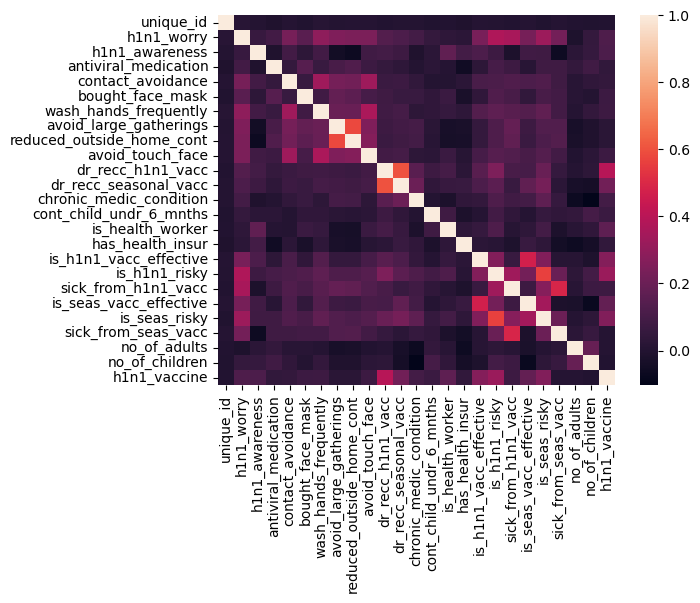

In [11]:
sns.heatmap(corr)

In [12]:
df=pd.get_dummies(df,columns=['qualification'])
df=pd.get_dummies(df,columns=['marital_status'])
df=pd.get_dummies(df,columns=['income_level'])
df=pd.get_dummies(df,columns=['housing_status'])
df=pd.get_dummies(df,columns=['employment'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 43 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   unique_id                               26707 non-null  int64  
 1   h1n1_worry                              26707 non-null  float64
 2   h1n1_awareness                          26707 non-null  float64
 3   antiviral_medication                    26707 non-null  float64
 4   contact_avoidance                       26707 non-null  float64
 5   bought_face_mask                        26707 non-null  float64
 6   wash_hands_frequently                   26707 non-null  float64
 7   avoid_large_gatherings                  26707 non-null  float64
 8   reduced_outside_home_cont               26707 non-null  float64
 9   avoid_touch_face                        26707 non-null  float64
 10  dr_recc_h1n1_vacc                       26707 non-null  fl

In [13]:
df.isnull().sum()

unique_id                                 0
h1n1_worry                                0
h1n1_awareness                            0
antiviral_medication                      0
contact_avoidance                         0
bought_face_mask                          0
wash_hands_frequently                     0
avoid_large_gatherings                    0
reduced_outside_home_cont                 0
avoid_touch_face                          0
dr_recc_h1n1_vacc                         0
dr_recc_seasonal_vacc                     0
chronic_medic_condition                   0
cont_child_undr_6_mnths                   0
is_health_worker                          0
has_health_insur                          0
is_h1n1_vacc_effective                    0
is_h1n1_risky                             0
sick_from_h1n1_vacc                       0
is_seas_vacc_effective                    0
is_seas_risky                             0
sick_from_seas_vacc                       0
age_bracket                     

In [14]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,marital_status_Married,marital_status_Not Married,"income_level_<= $75,000, Above Poverty","income_level_> $75,000",income_level_Below Poverty,housing_status_Own,housing_status_Rent,employment_Employed,employment_Not in Labor Force,employment_Unemployed
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,1,0,0,1,1,0,0,1,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,1,0,0,1,0,1,1,0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,0,0,1,0,1,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,1,0,0,1,0,1,0,1,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1,0,1,0,0,1,0,1,0,0


In [15]:
df.drop(['housing_status_Rent','employment_Unemployed','marital_status_Married','income_level_Below Poverty'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   unique_id                               26707 non-null  int64  
 1   h1n1_worry                              26707 non-null  float64
 2   h1n1_awareness                          26707 non-null  float64
 3   antiviral_medication                    26707 non-null  float64
 4   contact_avoidance                       26707 non-null  float64
 5   bought_face_mask                        26707 non-null  float64
 6   wash_hands_frequently                   26707 non-null  float64
 7   avoid_large_gatherings                  26707 non-null  float64
 8   reduced_outside_home_cont               26707 non-null  float64
 9   avoid_touch_face                        26707 non-null  float64
 10  dr_recc_h1n1_vacc                       26707 non-null  fl

In [16]:
df.shape

(26707, 39)

In [17]:
df=pd.get_dummies(df,columns=['age_bracket'])

In [18]:
df.drop(['age_bracket_65+ Years'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 42 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   unique_id                               26707 non-null  int64  
 1   h1n1_worry                              26707 non-null  float64
 2   h1n1_awareness                          26707 non-null  float64
 3   antiviral_medication                    26707 non-null  float64
 4   contact_avoidance                       26707 non-null  float64
 5   bought_face_mask                        26707 non-null  float64
 6   wash_hands_frequently                   26707 non-null  float64
 7   avoid_large_gatherings                  26707 non-null  float64
 8   reduced_outside_home_cont               26707 non-null  float64
 9   avoid_touch_face                        26707 non-null  float64
 10  dr_recc_h1n1_vacc                       26707 non-null  fl

In [19]:
df.drop(["housing_status_Own"],axis=1,inplace=True)

In [20]:
df=pd.get_dummies(df,columns=['census_msa'])
df=pd.get_dummies(df,columns=['race'])
df=pd.get_dummies(df,columns=['sex'])
df.shape

(26707, 47)

In [21]:
X=df.drop(['h1n1_vaccine'],axis=1)
y=df[['h1n1_vaccine']]

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
model_1=LogisticRegression()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 47 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   unique_id                               26707 non-null  int64  
 1   h1n1_worry                              26707 non-null  float64
 2   h1n1_awareness                          26707 non-null  float64
 3   antiviral_medication                    26707 non-null  float64
 4   contact_avoidance                       26707 non-null  float64
 5   bought_face_mask                        26707 non-null  float64
 6   wash_hands_frequently                   26707 non-null  float64
 7   avoid_large_gatherings                  26707 non-null  float64
 8   reduced_outside_home_cont               26707 non-null  float64
 9   avoid_touch_face                        26707 non-null  float64
 10  dr_recc_h1n1_vacc                       26707 non-null  fl

In [24]:
model_1.fit(X_train,y_train)

LogisticRegression()

In [25]:
model_1.score(X_train,y_train)

0.8219214721300953

In [26]:
model_1.score(X_test,y_test)

0.8269062772993885

In [27]:
from sklearn.tree import DecisionTreeClassifier
model_2=DecisionTreeClassifier(criterion='gini',max_depth=11,max_features=40,min_samples_split=5,min_samples_leaf=10)
model_2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=11, max_features=40, min_samples_leaf=10,
                       min_samples_split=5)

In [28]:
DecisionTreeClassifier(max_depth=11, max_features=40,
min_samples_leaf=10,
min_samples_split=5)

DecisionTreeClassifier(max_depth=11, max_features=40, min_samples_leaf=10,
                       min_samples_split=5)

In [29]:
model_2.score(X_train,y_train)

0.85925965550444

In [30]:
model_2.score(X_test,y_test)

0.8184200673904904

In [31]:
predictions=model_2.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.8184200673904904

In [32]:
from sklearn import metrics
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      6330
           1       0.59      0.43      0.50      1683

    accuracy                           0.82      8013
   macro avg       0.73      0.68      0.69      8013
weighted avg       0.80      0.82      0.81      8013



In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[5834,  496],
       [ 959,  724]], dtype=int64)

<Axes: >

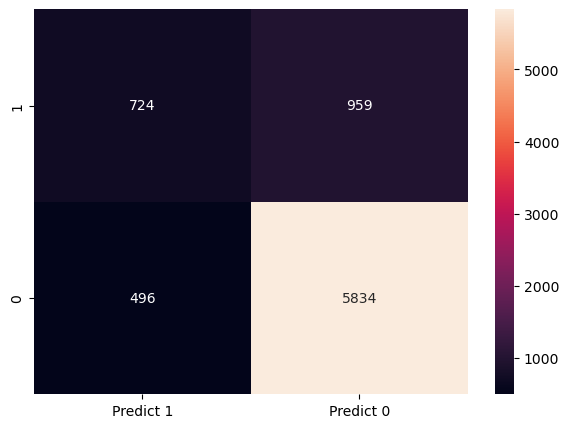

In [34]:
cm=metrics.confusion_matrix(y_test, predictions, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')

In [36]:
from sklearn.ensemble import BaggingClassifier
model_3=BaggingClassifier(n_estimators=100,max_features=40,max_samples=5000,n_jobs=50)
model_3.fit(X_train,y_train)
BaggingClassifier(max_features=40, max_samples=5000, n_estimators=100,
n_jobs=50)
model_3.score(X_train,y_train)

0.9024285867123141

In [37]:
model_3.score(X_test,y_test)

0.8440034943217272

In [38]:
predict=model_3.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predict)

0.8440034943217272

In [39]:
from sklearn import metrics
print(metrics.classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      6330
           1       0.72      0.42      0.53      1683

    accuracy                           0.84      8013
   macro avg       0.79      0.69      0.72      8013
weighted avg       0.83      0.84      0.83      8013



In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predict)

array([[6062,  268],
       [ 982,  701]], dtype=int64)

<Axes: >

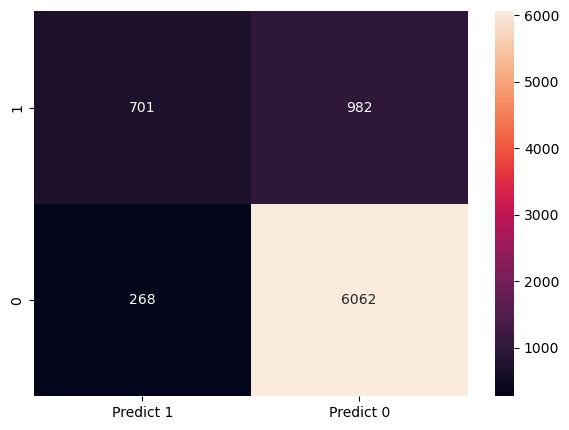

In [41]:
cm=metrics.confusion_matrix(y_test, predict, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')

In [43]:
from sklearn.ensemble import AdaBoostClassifier
model_4=AdaBoostClassifier(n_estimators=2000,algorithm='SAMME',learning_rate=20)
model_4.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME', learning_rate=20,
n_estimators=2000)

AdaBoostClassifier(algorithm='SAMME', learning_rate=20, n_estimators=2000)

In [44]:
model_4.score(X_train,y_train)

0.7988659462929282

In [45]:
model_4.score(X_test,y_test)

0.8048171720953451

In [46]:
from sklearn.ensemble import ExtraTreesClassifier
model_5=ExtraTreesClassifier(max_depth=12,min_samples_split=20,n_estimators=200)
model_5.fit(X_train,y_train)
ExtraTreesClassifier(max_depth=12, min_samples_split=20,
n_estimators=200)
model_5.score(X_train,y_train)

0.8662672515245533

In [47]:
model_5.score(X_test,y_test)

0.8380132285036815